**Creating Multiclass classification data**

In [ ]:
# using `make_blobs dataset` 
import torch
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# hyperparameter for dataset
NUM_CLASS=4 # output feature
NUM_FEATURES=2 # input feature
RANDOM_SEED=42

# creating multi class Blob dataset
X_blob, y_blob=make_blobs(n_samples=1000, random_state=RANDOM_SEED,n_features=NUM_FEATURES, # X features
                          centers=NUM_CLASS # y labels
                          )
# turning data into tensors
X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)


In [ ]:
# splitting data into training testing
X_blob_train, X_blob_test, y_blob_train, y_blob_test=train_test_split(X_blob, y_blob, random_state=42, test_size=0.2)
print(len(X_blob_test))
print(len(X_blob_train))
print(len(y_blob_train))
print(len(y_blob_test))


200
800
800
200


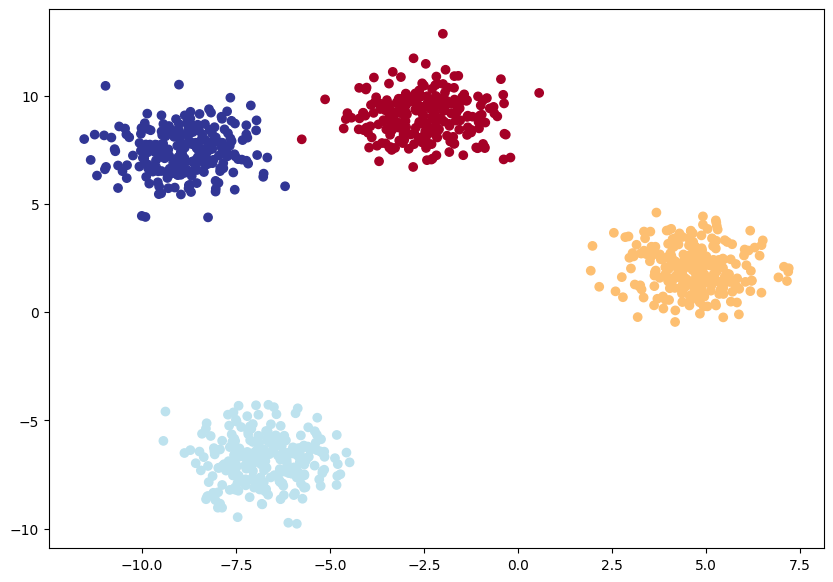

In [8]:
# plotting data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)
plt.show()

**Multiclass Classification Model**

In [9]:
# create device agonistic code
deivce='cuda' if torch.cuda.is_available() else 'cpu'
print(deivce)

cpu


In [10]:
from torch import nn

class BlobModel(nn.Module):
    def __init__(self, input_features, output_feautres, hidden_units):
        super().__init__()
        # way 2 of creating layers
        self.linear_layers_stacked=nn.Sequential(
            # layer 1
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            # layer 2
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            # layer 3
            nn.Linear(in_features=hidden_units, out_features=output_feautres),
        )

    def forward(self,x):
        return self.linear_layers_stacked(x)
    
# creating instance of BlobModel
model_4=BlobModel(input_features=NUM_FEATURES,
                  output_feautres=NUM_CLASS,
                  hidden_units=10).to(deivce)

model_4        

BlobModel(
  (linear_layers_stacked): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
  )
)

since, we are dealing with *multi-class classification* problem, we'll be using `nn.CrossEntropyLoss()` for loss function

In [11]:
# creating loss and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_4.parameters(),lr=0.1)

In [15]:
# accuracy_function
def accuracy_fn(y_truth, y_pred):
    correct=torch.eq(y_truth, y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc

**Model Training for multi-class classification**

In [16]:
torch.manual_seed(42)
epochs=1000

# putting data on device
X_blob_train,X_blob_test, y_blob_train, y_blob_test=X_blob_train.to(deivce),X_blob_test.to(deivce),y_blob_train.to(deivce),y_blob_test.to(deivce)

for epoch in range(epochs):
    
    # Training Model
    model_4.train()

    # forward pass
    y_logits=model_4(X_blob_train)
    y_pred=torch.softmax(y_logits, dim=1).argmax(dim=1)

    # loss, accuracy
    loss=loss_fn(y_logits, y_blob_train) # calculating loss between `predicted` and `actual value`
    acc=accuracy_fn(y_truth=y_blob_train,y_pred=y_pred)

    # zero optimization
    optimizer.zero_grad()

    # back propagation
    loss.backward()

    # updation
    optimizer.step()

    # Testing Model
    model_4.eval()
    with torch.inference_mode():
        # forward pass
        test_logits=model_4(X_blob_test)
        test_pred=torch.softmax(test_logits,dim=1).argmax(dim=1)

        # loss, accuracy
        test_loss=loss_fn(test_logits,y_blob_test)
        test_acc=accuracy_fn(y_truth=y_blob_test, y_pred=test_pred)

    if epoch%100==0:
        print(
            f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")





Epoch: 0 | Loss: 1.34769, Acc: 28.75% | Test Loss: 1.22210, Test Acc: 67.00%
Epoch: 100 | Loss: 0.01082, Acc: 99.88% | Test Loss: 0.00894, Test Acc: 100.00%
Epoch: 200 | Loss: 0.00510, Acc: 99.88% | Test Loss: 0.00363, Test Acc: 100.00%
Epoch: 300 | Loss: 0.00367, Acc: 99.88% | Test Loss: 0.00234, Test Acc: 100.00%
Epoch: 400 | Loss: 0.00302, Acc: 99.88% | Test Loss: 0.00177, Test Acc: 100.00%
Epoch: 500 | Loss: 0.00265, Acc: 99.88% | Test Loss: 0.00146, Test Acc: 100.00%
Epoch: 600 | Loss: 0.00241, Acc: 99.88% | Test Loss: 0.00126, Test Acc: 100.00%
Epoch: 700 | Loss: 0.00224, Acc: 99.88% | Test Loss: 0.00112, Test Acc: 100.00%
Epoch: 800 | Loss: 0.00210, Acc: 99.88% | Test Loss: 0.00102, Test Acc: 100.00%
Epoch: 900 | Loss: 0.00200, Acc: 99.88% | Test Loss: 0.00094, Test Acc: 100.00%


In [17]:
# model predictions
model_4.eval()
with torch.inference_mode():
    y_logits=model_4(X_blob_test)
    y_preds=torch.softmax(y_logits,dim=1).argmax(dim=1)


In [19]:
print(y_preds[:10])
print(y_blob_test[:10])

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])


In [20]:
# testing accuracy
test_accuracy=accuracy_fn(y_truth=y_blob_test, y_pred=y_preds)
print(test_accuracy)

100.0


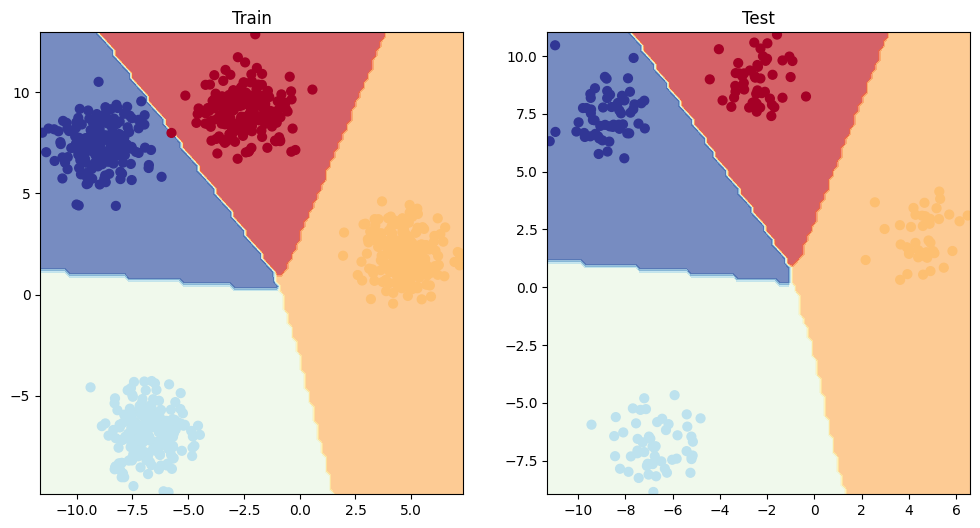

In [21]:
# plotting using `precision_decsion_boundary`
from helper_functions import plot_decision_boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)